In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
pd_test = pd.read_csv("./SDGE_Node_MCC_TS_T_0901_0905.csv")
pd_test

,Unnamed: 0,SANYSDRO_6_N004,NOISLMTR_6_N101,MISSION_6_N001,EASTGATE_6_N101,F_6_N001,BATIQTOS_1_N015,PARADISX_6_N004,GENESEE_6_N015,PALOMAR_1_N001,...,BERNARDO_6_N013,BDLRKSP2_7_B1,DELMAR_6_N011,MONSRATE_6_N007,GRANITE_6_N007,MISSION_6_N049,IMPRLBCH_6_N004,RINCON_1_N003,RCARMEL_6_N001,BDLRKSP1_7_B1
0,2022-09-01 07:00:00+00:00,98.35911,98.60331,99.33590,101.12525,99.33590,96.31991,98.60331,101.20323,95.83151,...,10.08637,9.65350,9.21922,9.65209,10.51923,9.21922,9.21922,9.21922,21.72068,9.65209
1,2022-09-01 07:15:00+00:00,8.86856,8.86856,8.86856,8.86856,8.86856,8.91358,8.86856,8.86856,8.91358,...,-2.43828,-2.81605,-2.43828,-2.01865,-2.81605,-2.43828,-2.81605,0.00000,-2.43828,-2.81605
2,2022-09-01 07:30:00+00:00,14.43587,14.43587,14.47242,14.47242,14.47242,14.58525,14.43587,14.47242,14.58525,...,4.89259,4.46714,4.67986,5.10531,4.46714,4.67986,4.46714,0.00000,4.67986,4.46714
3,2022-09-01 07:45:00+00:00,16.49623,16.49623,16.54152,16.54152,16.54152,16.62484,16.49623,16.54152,16.62484,...,10.75982,9.82419,10.29200,11.22764,9.82419,10.29200,9.82419,0.00000,10.29200,9.82419
4,2022-09-01 08:00:00+00:00,2.99366,2.99366,3.00187,3.00943,3.00187,3.01699,2.99366,3.00943,3.01699,...,101.93582,98.35911,101.20323,90.69704,99.82430,99.33590,98.35911,-14.53822,102.83464,98.35911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2022-09-05 05:45:00+00:00,16.65836,17.28979,17.28979,17.32676,17.28979,18.03213,16.65836,17.32676,18.03213,...,26.64514,-265.65054,26.64514,28.08732,26.00022,26.49279,58.27624,35.64923,26.64514,-265.65054
380,2022-09-05 06:00:00+00:00,23.20940,23.20940,23.27791,23.34641,23.27791,24.16456,22.45975,23.34641,24.16456,...,25.10094,24.28358,25.10094,26.61541,24.28358,24.98069,24.28358,28.25851,25.10094,24.28358
381,2022-09-05 06:15:00+00:00,21.62467,21.62467,21.62467,21.69091,21.62467,22.50931,20.93875,21.69091,23.19523,...,26.22296,25.35820,26.10080,27.83033,25.35820,26.10080,25.35820,28.70867,26.22296,25.35820
382,2022-09-05 06:30:00+00:00,11.81338,11.81338,11.83483,11.85628,11.83483,12.78012,11.81338,12.30748,12.78012,...,22.62144,21.88005,22.62144,24.18527,21.88005,22.54037,21.88005,19.04942,22.62144,21.88005


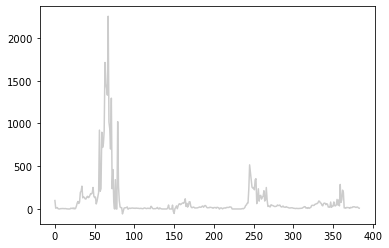

In [21]:
np_data = np.zeros((384,257),dtype=float)
for i in range(384):
    np_data[i] = pd_test.iloc[i].to_numpy()[1:]

np_data = np_data.T
plt.plot(np_data[1].ravel(), "k-", alpha=.2)

Euclidean k-means
109077.659 --> 88910.966 --> 88855.562 --> 88855.562 --> 


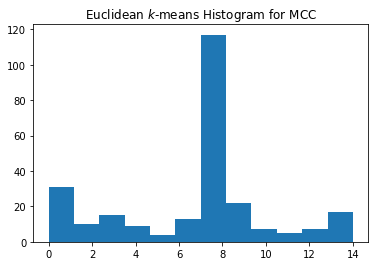

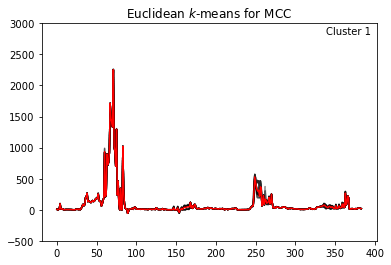

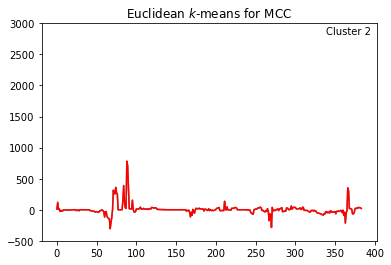

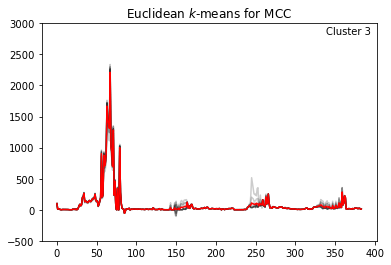

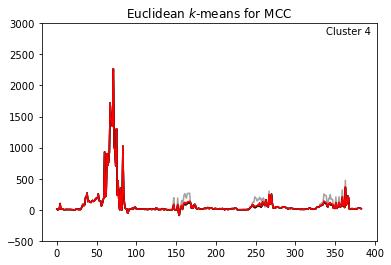

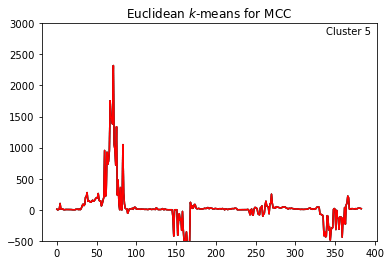

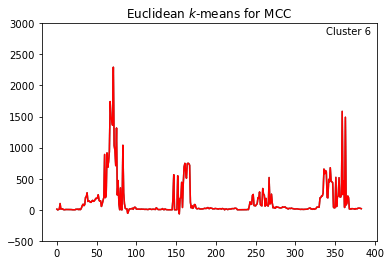

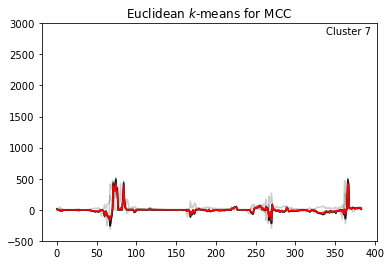

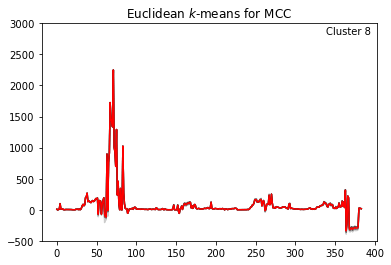

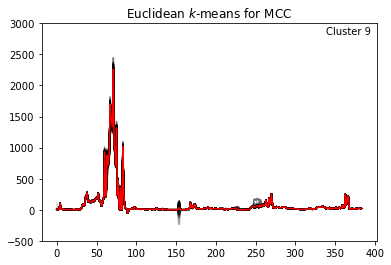

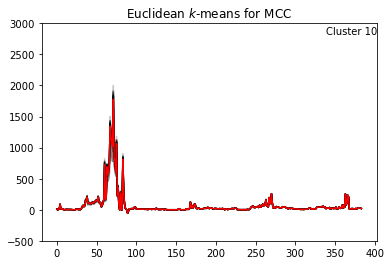

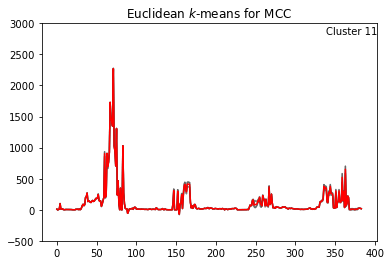

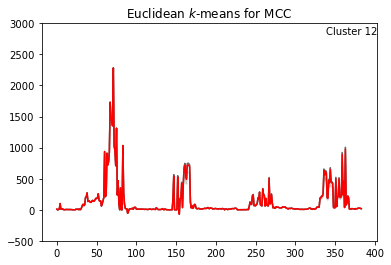

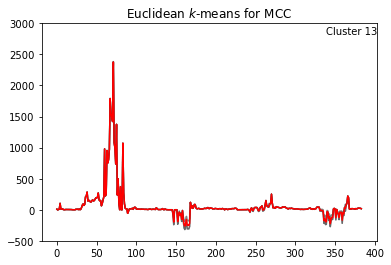

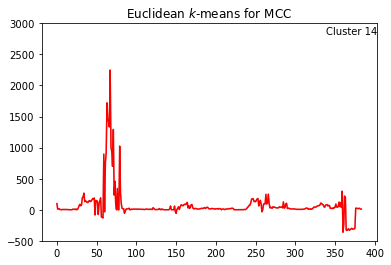

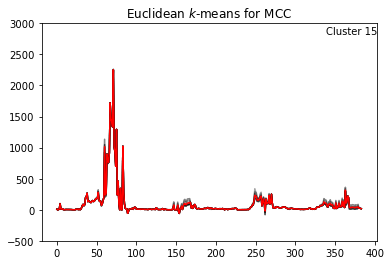

In [28]:
clusters = 15
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=clusters, verbose=True, random_state=seed)
y_pred = km.fit_predict(np_data)

# print(y_pred)
plt.hist(y_pred, bins='auto')
plt.title("Euclidean $k$-means Histogram for MCC")

for yi in range(clusters):
    plt.figure(yi)
#     plt.subplot(3, 3, yi + 1)
    for xx in np_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
#     print(km.cluster_centers_[yi])
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
    plt.ylim(-500, 3000)
    plt.text(0.85, 0.95,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    plt.title("Euclidean $k$-means for MCC")
#     plt.savefig('./plots/clustering/{}/MOER_clustering_{}_{}_cluster{}.jpg'.format(region,theYear,region,yi+1))
    plt.show()